In [12]:
import numpy as np
import pickle as pk
import os
import matplotlib.pyplot as plt

from PIL import Image , ImageOps,ImageFilter,ImageEnhance
import pandas as pd

#image Processing
from keras.preprocessing.image import ImageDataGenerator





In [5]:
#loading data

image_paths = 'images'

train_images = pd.read_csv('train.csv')
test_images = pd.read_csv('test.csv')
samples = pd.read_csv('sample_submission.csv')

In [6]:
#total images 
print('image in train',len(train_images))
print('image in test',len(test_images))

print('total images',len(train_images) + len(test_images))


image in train 1646
image in test 706
total images 2352


In [7]:
def visualizer(imgs , figs = (15,15) ,c = None):
    _,a = plt.subplots(5,5,figsize = figs) 
    
    for i,j in enumerate(a.flat):
        j.imshow(imgs[i],cmap = c)
        
        
  


In [5]:
len(os.listdir(image_paths))

2352

In [8]:
train_images.iloc[:3]

image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0

(224, 224) RGB None
<class 'PIL.Image.Image'>


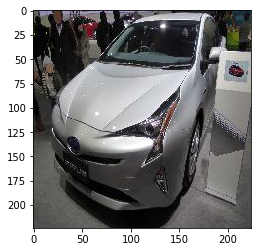

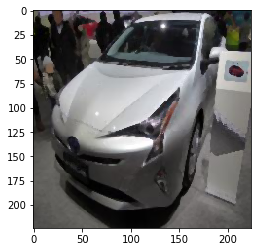

In [13]:
for image,label in zip(train_images.iloc[:,0],train_images.iloc[:,1]):

    img_path = os.path.join(image_paths,image)
    img  = Image.open(img_path)
    
    
    
    plt.imshow(img)
    plt.figure()
    img = img.filter(ImageFilter.MedianFilter)
    
  
    
    
    
    plt.imshow(img)
    print(img.size,img.mode,img.format)
    print(type(img))
    
    
    break

(224, 224) RGB JPEG
<class 'PIL.Image.Image'>


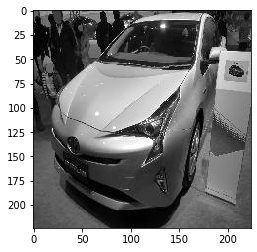

In [14]:
for image,label in zip(train_images.iloc[:,0],train_images.iloc[:,1]):

    img_path = os.path.join(image_paths,image)
    img  = Image.open(img_path)
    
    gray = ImageOps.grayscale(img)
    
    
    
    
    plt.imshow(gray,cmap = 'gray')
    
    print(img.size,img.mode,img.format)
    print(type(gray))
  
    
    break

In [18]:
np.asarray(gray).shape

(224, 224)

#Color 

In [15]:
train  = []
labels = []
for image,label in zip(train_images.iloc[:,0],train_images.iloc[:,1]):

    img_path = os.path.join(image_paths,image)
    img  =  Image.open(img_path)
    img  = img.filter(ImageFilter.MedianFilter)
    train.append(np.asarray(img))
    labels.append(label)
#     plt.imshow(img)
   
             

In [8]:
train[0].shape

(224, 224, 3)

In [10]:
len(train),len(labels)

(1646, 1646)

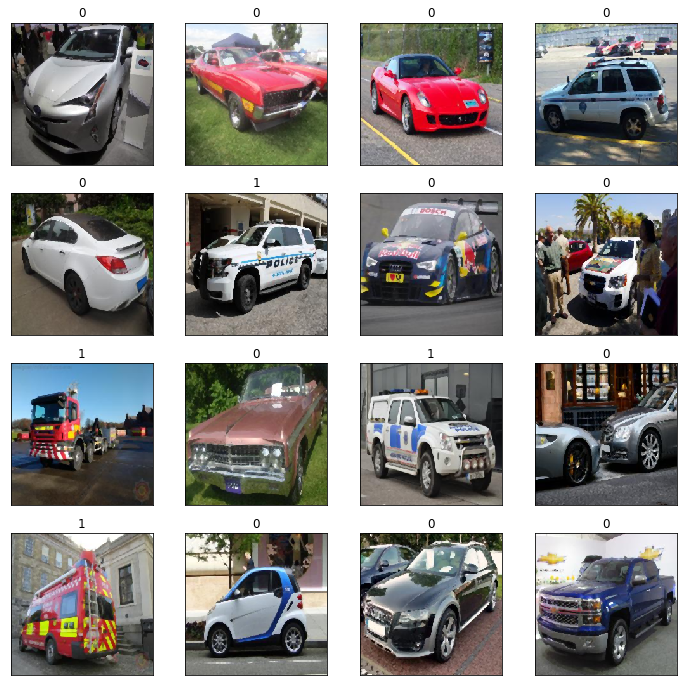

In [175]:
#subplot 

fig,ax = plt.subplots(nrows = 4,ncols = 4,figsize = (12,12))

for index,i in enumerate(ax.flatten()):
    i.imshow(train[index])
    i.set_title(labels[index])
    
    i.set_xticks([])
    i.set_yticks([])





0 - non - emergency 
1 - emergency

# Gray Scale

In [19]:
# train  = []
# labels = []
# for image,label in zip(train_images.iloc[:,0],train_images.iloc[:,1]):

#     img_path = os.path.join(image_paths,image)
#     img  = Image.open(img_path)
#     img = ImageOps.grayscale(img)
    
#     img = np.asarray(img)
#     train.append(img)
#     labels.append(label)
# #     plt.imshow(img)
   
             

In [20]:
# test  = []
# for image in test_images.iloc[:,0]:

#     img_path = os.path.join(image_paths,image)
#     img  = Image.open(img_path)
#     img = ImageOps.grayscale(img)
#     img = np.asarray(img)
#     test.append(img)

   
             

# class balance

In [12]:
pd.Series(labels).value_counts()

0    965
1    681
dtype: int64

284

# loading the test images

In [16]:
test  = []
for image in test_images.iloc[:,0]:

    img_path = os.path.join(image_paths,image)
    img  = Image.open(img_path)
#     img  = np.asarray(img)
    img  = img.filter(ImageFilter.MedianFilter)

    test.append(np.asarray(img))
#     plt.imshow(img)
   
             

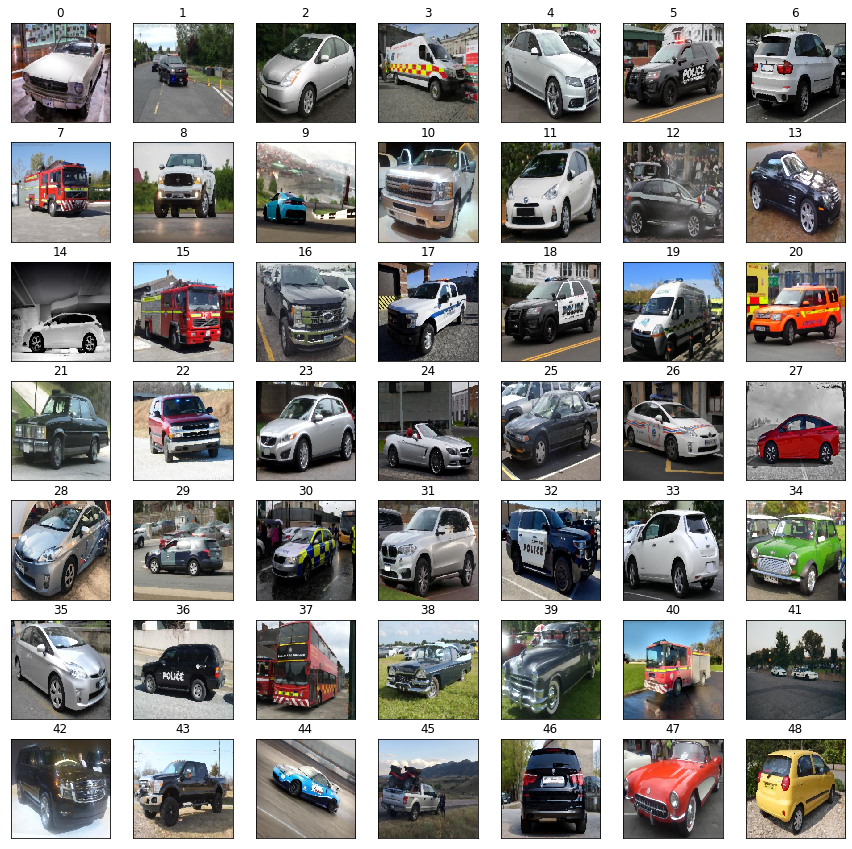

In [257]:
#subplot 

fig,ax = plt.subplots(nrows = 7,ncols = 7,figsize = (15,15))

for index,i in enumerate(ax.flatten()):
    i.imshow(test[index])
    i.set_title(index)
    i.set_xticks([])
    i.set_yticks([])
    

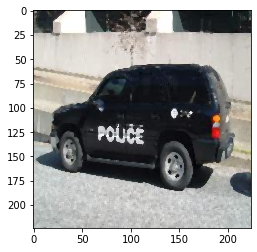

In [259]:
plt.imshow(test[36])

Prepeprocessing 1 try balance classes

# Checking All Emergency Vehicles

In [18]:
def visualizer2(imgs , figs = (15,15) ,c = None,index = None):
    _,a = plt.subplots(5,5,figsize = figs) 
    
    for i,j in enumerate(a.flat):
        j.imshow(imgs[i],cmap = c)
        j.set_title(index[i])
        j.set_xticks([])
        j.set_yticks([])
        
        
  


In [198]:

class1_index = train_images[train_images.emergency_or_not == 1].index.values

train = np.array(train)



IndexError: index 6 is out of bounds for axis 0 with size 6

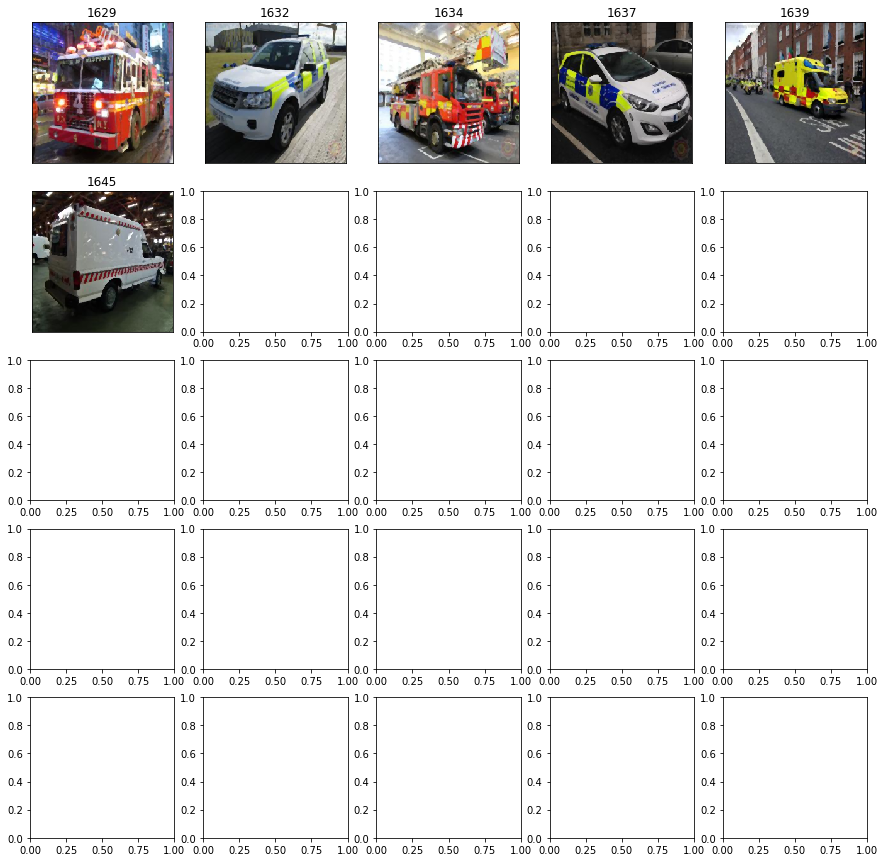

In [243]:
#need 284 more images 

#180 220 205 294 303 288 472 444,612,21

#  not emergency 353 , 378 , 382 , 1123,1488 - wrong assumption

# to delete 405

#half car : 810,778,1174,1286,1284,1421,1626

#blurred : 948,1288 - not a problem


#todelete : 405


#missclassified : 65,438

index = class1_index[675:]

visualizer2(train[index],index = index)



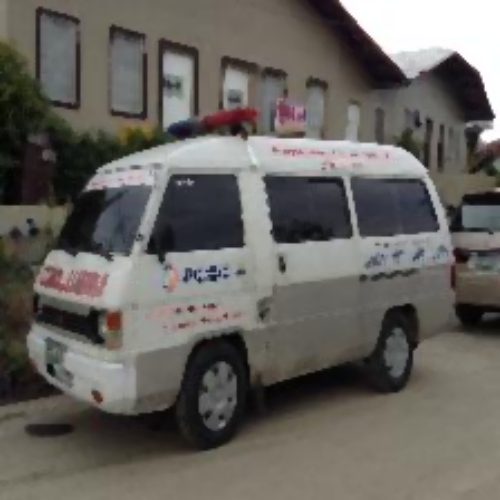

In [250]:
#index 384

import cv2


img = cv2.resize(train[1571],(500,500))

img  = Image.fromarray(img)

img 
# img
# img.filter(ImageFilter.MedianFilter)
# img.filter(ImageFilter.SHARPEN)
# cv2.imshow('dasd',cv2.blur(img,3))
# cv2.waitKey(0)

# Checking all Non-Emergency Images

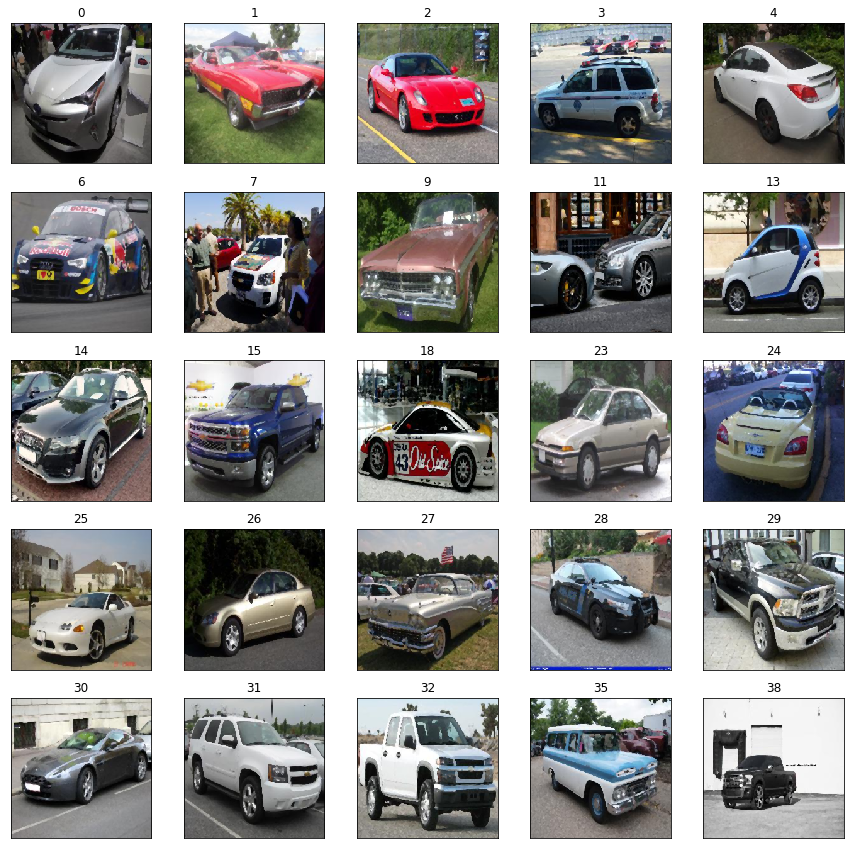

In [19]:

class0_index = train_images[train_images.emergency_or_not == 0].index.values

train = np.array(train)

index = class0_index[0:]

visualizer2(train[index],index = index)

#rare 430,240,479
#police cars 3,1348,497



(224, 224, 3)


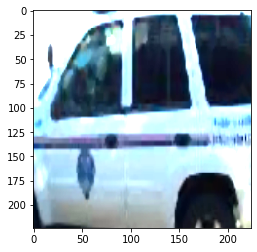

In [156]:

datagen = ImageDataGenerator(brightness_range=[5.0,1.0],zoom_range=[0.3,0.7])

itr = datagen.flow(np.expand_dims(train[3],axis= 0),batch_size = 16)

images = next(itr)[0]

print(images.shape)
plt.imshow(images.astype('uint8'))

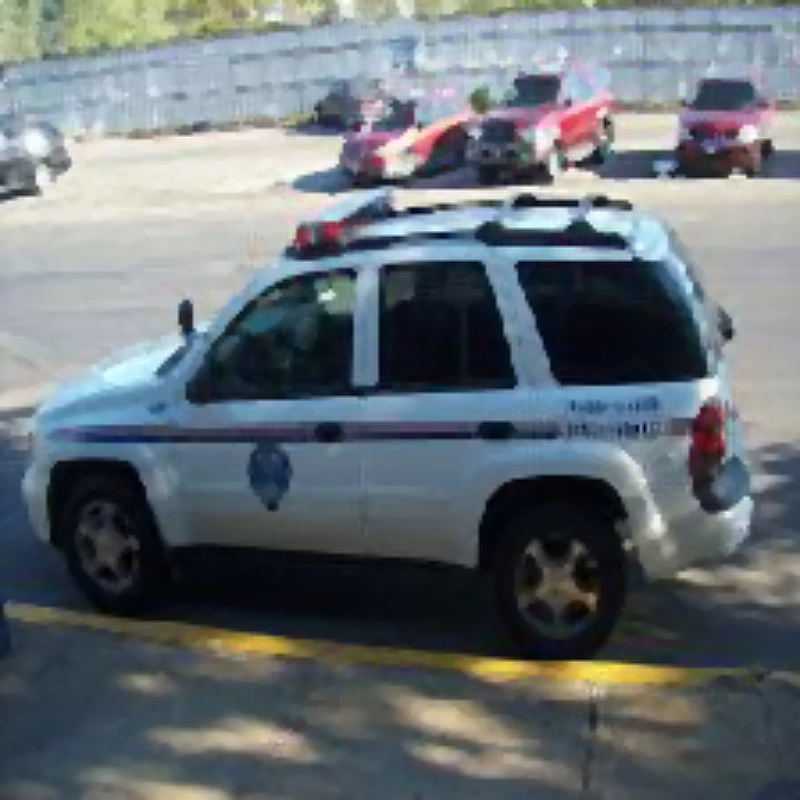

In [159]:
import cv2


img = cv2.resize(train[3],(800,800))

img  = Image.fromarray(img)
img.filter(ImageFilter.GaussianBlur)
img.filter(ImageFilter.SHARPEN)
# cv2.imshow('dasd',cv2.blur(img,3))
# cv2.waitKey(0)

# This looks like a police car  mislabeled as non_emergeny vehicles

# There are total 3 images 

# Data Cleaning 

In [85]:
idx = [3,1348,497,240,479,405]


train =  np.asarray(train)
labels = np.asarray(labels)

print(train.shape)
print(labels.shape)

# labels = np.asarray(labels)

# visualizer2(train[idx],index = labels[idx])


'''
index 3,1348,497 : change label to 1
index 240,479,405 : delete this dashboard images 
'''

labels[[3,1348,497]] = 1
labels[[3,1348,497]]


(1646, 224, 224, 3)
(1646,)


array([1, 1, 1])

In [86]:
train = np.delete(train,[240,479,405],axis = 0)
labels = np.delete(labels,[240,479,405])


In [88]:
pd.Series(labels).value_counts()

0    960
1    683
dtype: int64

In [89]:
pk.dump(train,open('train_images_median_filter_dc','wb'))
pk.dump(labels,open('train_labels_median_filter_dc','wb'))
# pk.dump(test,open('test_images_gray','wb'))



# Test dataset

In [26]:
def visualizer_aug(imgs , figs = (15,15) ,c = None,index = None):
    _,a = plt.subplots(5,5,figsize = figs) 
    
    for i,j in enumerate(a.flat):
        j.imshow(imgs[i],cmap = c)
        j.set_title(index[i])
        j.set_xticks([])
        j.set_yticks([])
        
        
  


IndexError: index 6 is out of bounds for axis 0 with size 6

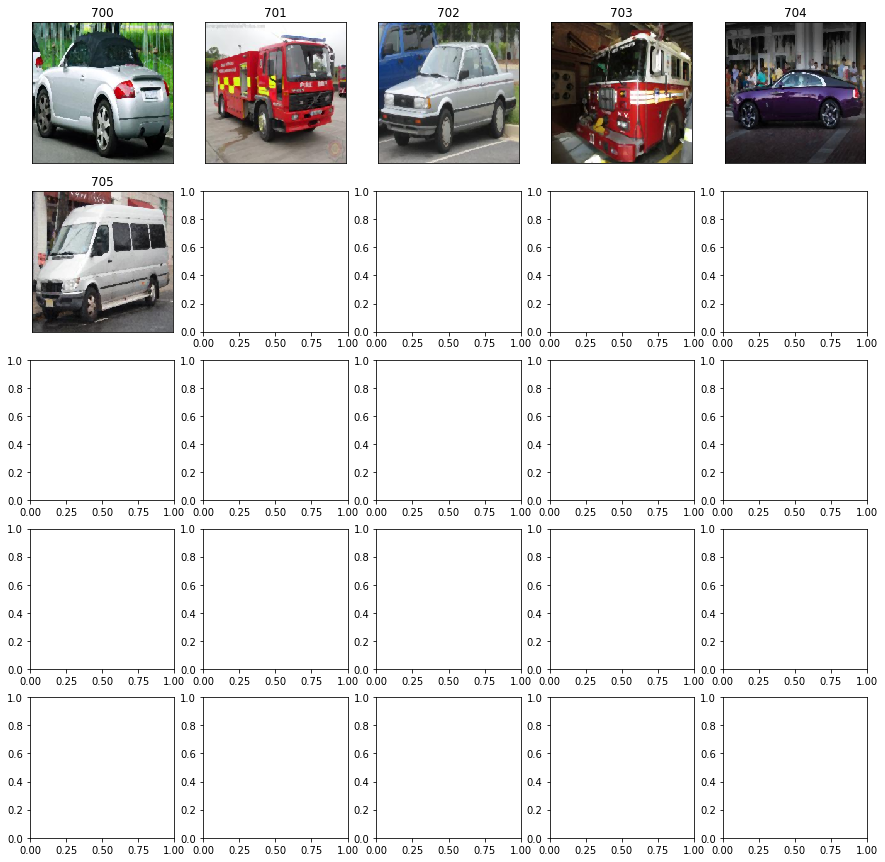

In [56]:
test_indexes = test_images.index.values

test = np.array(test)
index = test_indexes[700:]
visualizer2(test[index],index = index)

#rare : 159,319
#half-cars : 160,312,488,552,608

#difficult to predict = 187,346,395,453,500

#may need augmenattion = 128 (zoom in)



#noise : 551

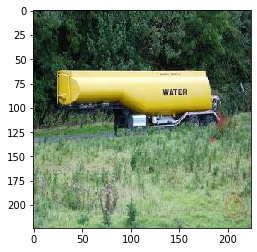

In [122]:
plt.imshow(test[159])

# Data Augmentation  Train Data

In [348]:
ImageDataGenerator?

In [373]:
# ImageDataGenerator?
'''
featurewise_center=False # entire dataset,
samplewise_center=False #per sample,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
zca_epsilon=1e-06,
'''

datagen = ImageDataGenerator(samplewise_center=True,
                             samplewise_std_normalization=True,
                             )

datagen.fit(train)


(25, 224, 224, 3)


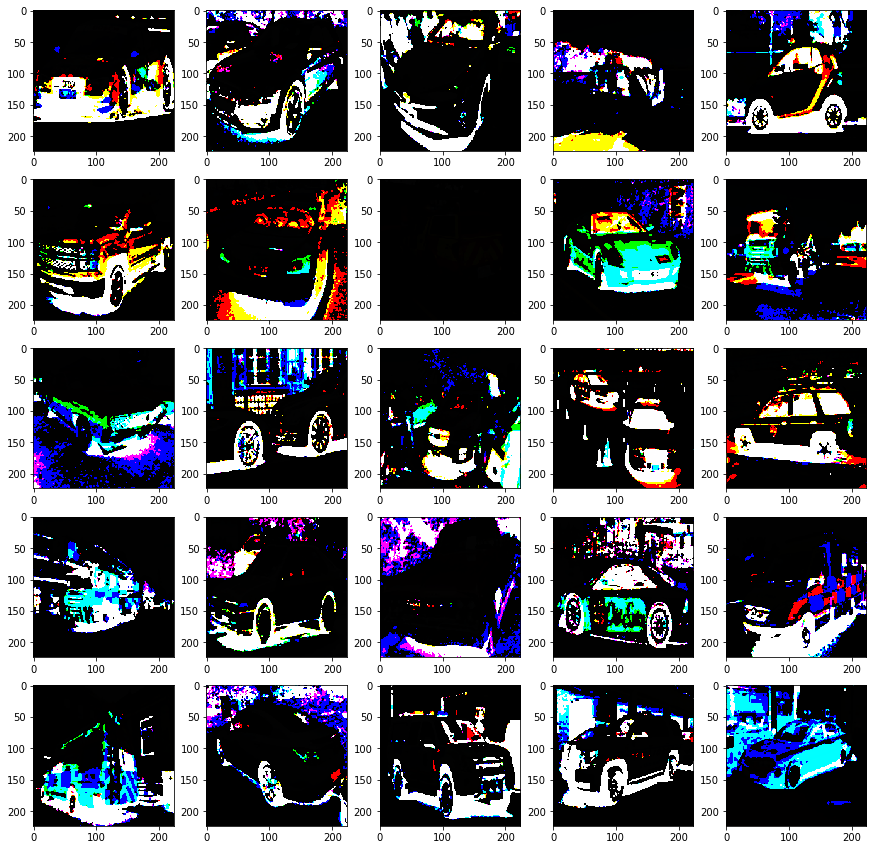

In [374]:
iterator = datagen.flow(np.asarray(train[0:25]),labels[0:25],batch_size = 25)
    
data = np.array(next(iterator)[0],dtype = 'uint8')

print(data.shape)
visualizer(data)


###### the transfer models have their own preporcessing functions

with feature wise all the images are super dark infect only 4 unique value are present 0,1,2,3

In [378]:
#data Generator part 
'''
featurewise_center=False, -not usefull
samplewise_center=False,  -not usefull
featurewise_std_normalization=False, -usefull
samplewise_std_normalization=False,  -usefull
zca_whitening=False, - will need to see
zca_epsilon=1e-06,  
rotation_range=0, 
width_shift_range=0.0, - will need to see
height_shift_range=0.0, - will need to see
brightness_range=None,  
shear_range=0.0,
zoom_range=0.0,
channel_shift_range=0.0,
fill_mode='nearest',  -keep as reflect
cval=0.0,             -not needed     
horizontal_flip=False, - useful
vertical_flip=False,   - not needed
rescale=None,          - not sure
preprocessing_function=None, 
data_format='channels_last',
validation_split=0.0,
interpolation_order=1,
dtype='float32',

'''    
datagen = ImageDataGenerator(horizontal_flip = True,
#                              vertical_flip = True, not needed 
                             width_shift_range=.20, # may be usefull
                             height_shift_range=.20,# may be usefull
                             
                             rotation_range=70,
                             
#                              cval = 0,
                             fill_mode = 'reflect' # this looks better
                             
                           
                             
                                )



# visualizer(data)


(25, 224, 224, 3)


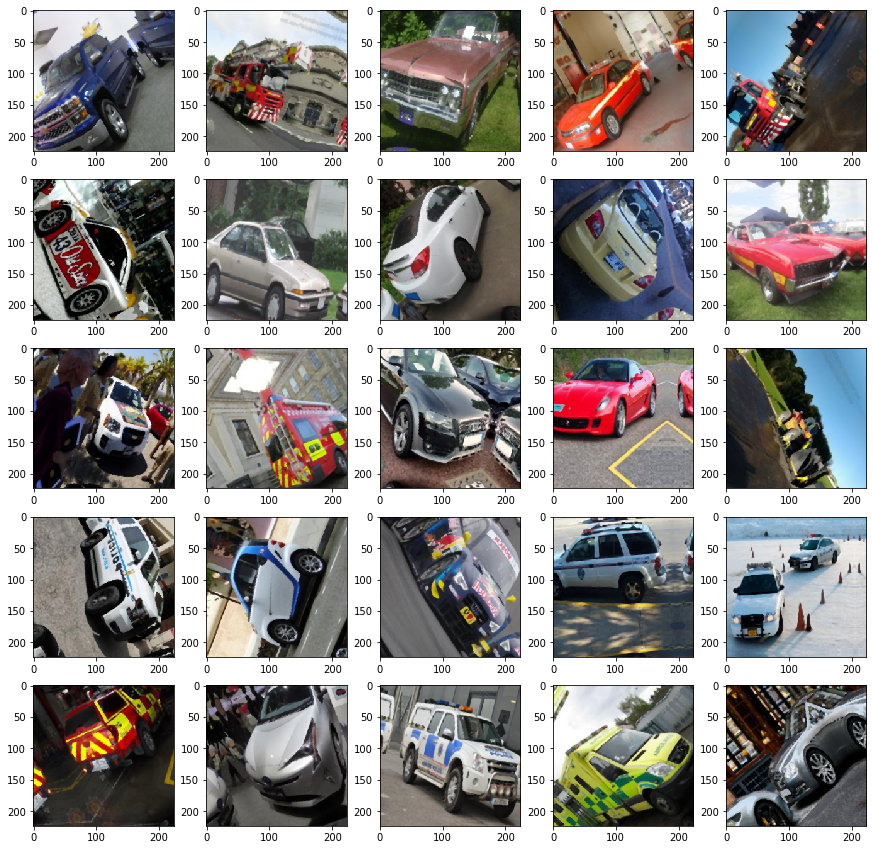

In [379]:
iterator = datagen.flow(np.asarray(train[0:25]),labels[0:25],batch_size = 248)
    
data = np.array(next(iterator)[0],dtype = 'uint8')

print(data.shape)
visualizer(data)

### the densenet and efficient net architectures were able to detect the cars which were rotated at an angle. so rotation and shifting might not be usefull 


##### Checking These Params.
1. brightness_range=None,  
2. shear_range=0.0,
3. zoom_range=0.0,
4. channel_shift_range=0.0,

In [441]:
ImageDataGenerator?

(26, 224, 224, 3)


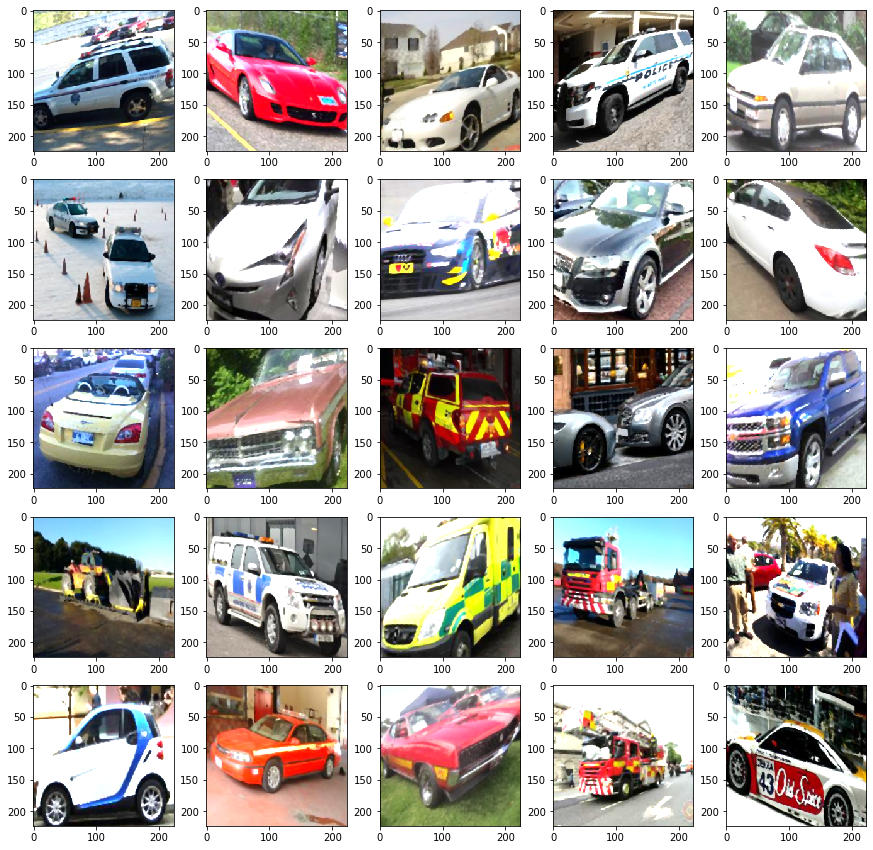

In [451]:
#data Generator part 

'''
from experiment will still need to confirm.
zoom_range = 1 means no zoom
           > 1 means zoom out
           < 1 means zoom in
           
brightness_range +ve bright 
                 -ve dark
           
                1 means no change
                
                
channel_shift_range works same as brightness_range.                
'''

datagen = ImageDataGenerator(
                              zoom_range = [1,0.7], #may be usefull
                              shear_range=20,   #usefull but dont use values > 60
                             fill_mode = 'reflect', # this looks better
                              brightness_range=[1,2.0] ,
#                                 channel_shift_range=.9
                             )



iterator = datagen.flow(np.asarray(train[0:26]),labels[0:26],batch_size = 248)
    
data = np.array(next(iterator)[0],dtype = 'uint8')

print(data.shape)
visualizer(data)


## Experiments 

1. scaling vs starndard
2. feature vs sampling 

